In [45]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('full_data.csv')

In [47]:
df.head()

,Unnamed: 0,latitude,longitude,Number of Bikes,business_name,categories,address,rating,review_count
0,557,34.03,-118.28,9,23rd Street Cafe,"American Restaurant, Indian Restaurant, Mexica...","936 W 23rd St (at Portland St), Los Angeles, C...",4.0,508
1,1168,34.06,-118.26,6,3rd Street Tunnel,Hiking Trail,"Los Angeles, CA 90012",4.0,4
2,1355,34.09,-118.28,2,4100 Bar,"Cocktail Bar, BBQ Joint","1087 Manzanita St (at Sunset Blvd), Los Angele...",4.0,565
3,1192,33.99,-118.42,8,90 West Lounge,"Cocktail Bar, Dive Bar, Sports Bar","12740 Culver Blvd (McConnell), Los Angeles, CA...",4.5,161
4,522,34.06,-118.29,5,A-Won Japanese Restaurant,"Sushi Restaurant, Korean Restaurant","913 S Vermont Ave (San Marino), Los Angeles, C...",3.5,296


In [50]:
df.drop(columns=['categories','address','Unnamed: 0'],inplace=True)

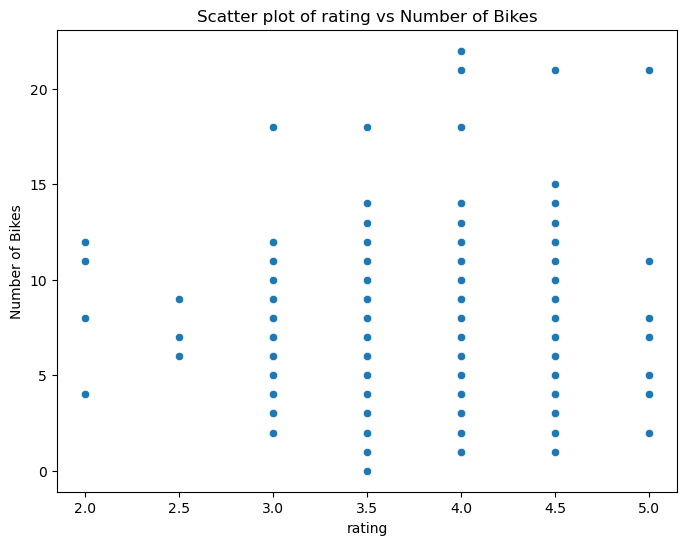

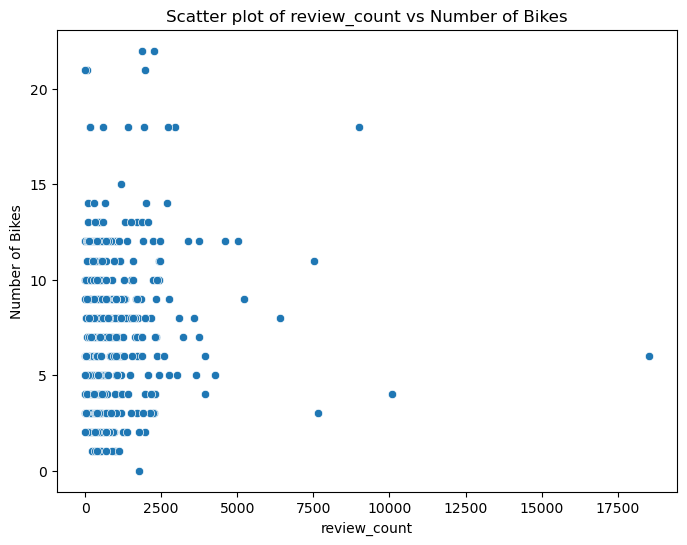

In [51]:
# 1. Evaluate Linearity
for col in ['rating', 'review_count']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Number of Bikes', data=df)
    plt.title(f'Scatter plot of {col} vs Number of Bikes')
    plt.show()

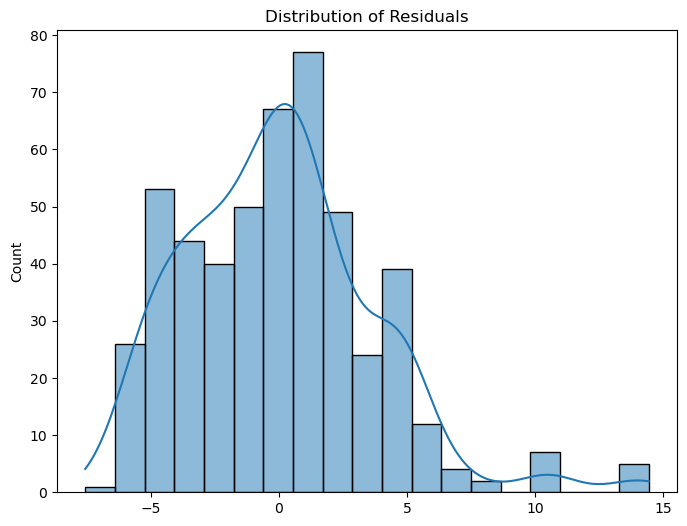

In [52]:
#Check for Normality
residuals = results.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

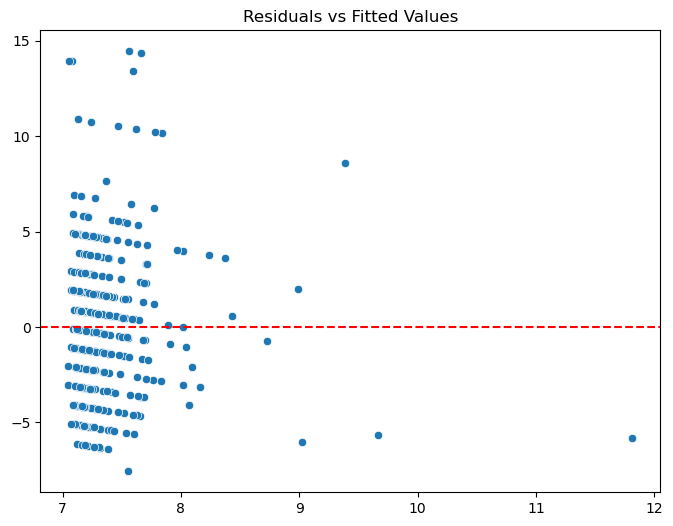

In [53]:
#Assess Homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.show()

In [54]:
#Identify Outliers and Influential Data Points
influence = results.get_influence()
resid_student = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]

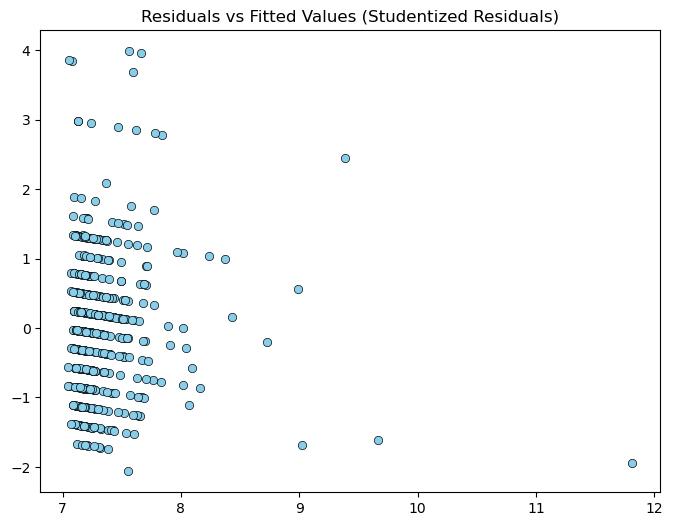

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results.fittedvalues, y=resid_student, marker='o', color='skyblue', edgecolor='black')
plt.title('Residuals vs Fitted Values (Studentized Residuals)')
plt.show()

In [56]:
# Standardize or scale the features
df[['rating', 'review_count']] = (df[['rating', 'review_count']] - df[['rating', 'review_count']].mean()) / df[['rating', 'review_count']].std()

Build a regression model.

In [80]:
# independent variables -> features
X = df[['review_count','rating','longitude','latitude']]

# the dependent variable
y = df['Number of Bikes']

# Build the OLS model with the interaction term
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

Provide model output and an interpretation of the results.

In [81]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Number of Bikes   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              565.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                   3.40e-183
Time:                        20:36:08   Log-Likelihood:                         -1332.8
No. Observations:                 500   AIC:                                      2674.
Df Residuals:                     496   BIC:                                      2690.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Model Evaluation: The model shows an uncentered R-squared value of 0.820, indicating that approximately 82% of the variance in the dependent variable, 'Number of Bikes', can be explained by the independent variables. This means the model provides a reasonable fit to the data.

Variable Coefficients: The coefficient values for the independent variables reveal the strength and direction of their relationships with the dependent variable. Notably, 'review_count' has a coefficient of 0.3457, suggesting that an increase in the 'review_count' is associated with a corresponding increase in the 'Number of Bikes'. Conversely, the coefficient for 'rating' is 0.0006, indicating that changes in 'rating' have a minimal effect on the 'Number of Bikes'.

Significance of Variables: The significance of the variables is assessed through the P-values (P>|t|). In this case, 'review_count', 'longitude', and 'latitude' have P-values less than 0.05, indicating a statistically significant relationship with the 'Number of Bikes'. However, 'rating' has a high P-value of 0.997, suggesting that it is not a statistically significant predictor of the 'Number of Bikes' in the current model.

# Stretch

How can you turn the regression model into a classification model?

Define Classes: Start by defining classes or categories for the 'Number of Bikes' variable. For example, you could create bins or ranges for different levels of bike usage, such as 'Low Usage', 'Moderate Usage', and 'High Usage'.

Create Class Labels: Assign each data point to one of the defined classes based on the corresponding 'Number of Bikes' value. This step involves mapping the continuous values of 'Number of Bikes' to discrete class labels.

Model Selection: Choose a suitable classification algorithm, such as Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines, based on the nature of the data and the problem at hand.

Evaluation and Interpretation: Assess the model's performance in predicting the classes of bike usage. Understand the key features contributing to the classification decision and their relative importance in determining the level of bike usage.